In [3]:
import pandas as pd
import numpy as np


behaviors_path = "C:/Users/chiki/OneDrive/Desktop/SEM6/FL/MINDsmall_train/behaviors.tsv"
news_path = "C:/Users/chiki/OneDrive/Desktop/SEM6/FL/MINDsmall_train/news.tsv"
entity_embedding_path = "C:/Users/chiki/OneDrive/Desktop/SEM6/FL/MINDsmall_train/entity_embedding.vec"
relation_embedding_path = "C:/Users/chiki/OneDrive/Desktop/SEM6/FL/MINDsmall_train/relation_embedding.vec"


In [4]:
def preprocess_behaviors(file_path, output_path):
    """
    Process the user click histories and impression logs from behaviors.tsv.
    Save the preprocessed file after completion.
    """
    columns = ["impression_id", "user_id", "time", "history", "impressions"]
    behaviors = pd.read_csv(file_path, sep="\t", names=columns)

    behaviors["history"] = behaviors["history"].fillna("").apply(lambda x: x.split(" "))

    behaviors["impressions"] = behaviors["impressions"].apply(
        lambda x: [tuple(impression.split("-")) for impression in x.split(" ")]
    )

    behaviors.to_csv(output_path, index=False)
    return behaviors

behaviors_df = preprocess_behaviors(behaviors_path, "preprocessed_behaviors.csv")
print("Behaviors processed and saved to 'preprocessed_behaviors.csv':")
print(behaviors_df.head())

Behaviors processed and saved to 'preprocessed_behaviors.csv':
   impression_id user_id                   time  \
0              1  U13740  11/11/2019 9:05:58 AM   
1              2  U91836  11/12/2019 6:11:30 PM   
2              3  U73700  11/14/2019 7:01:48 AM   
3              4  U34670  11/11/2019 5:28:05 AM   
4              5   U8125  11/12/2019 4:11:21 PM   

                                             history  \
0  [N55189, N42782, N34694, N45794, N18445, N6330...   
1  [N31739, N6072, N63045, N23979, N35656, N43353...   
2  [N10732, N25792, N7563, N21087, N41087, N5445,...   
3  [N45729, N2203, N871, N53880, N41375, N43142, ...   
4                   [N10078, N56514, N14904, N33740]   

                                         impressions  
0                         [(N55689, 1), (N35729, 0)]  
1  [(N20678, 0), (N39317, 0), (N58114, 0), (N2049...  
2  [(N50014, 0), (N23877, 0), (N35389, 0), (N4971...  
3  [(N35729, 0), (N33632, 0), (N49685, 1), (N2758...  
4  [(N39985, 0), (

In [5]:
import pandas as pd

entity_embedding = pd.read_csv('MINDsmall_train/entity_embedding.vec', sep=' ', header=None)
print(f"Shape of entity_embedding: {entity_embedding.shape}")

if entity_embedding.shape[1] == 101:
    entity_embedding.columns = ['ID'] + [f'embedding_{i}' for i in range(1, 101)]
else:
    print("File does not have the expected 101 columns. Adjust column assignment accordingly.")
    entity_embedding.columns = [f'col_{i}' for i in range(entity_embedding.shape[1])]

print(entity_embedding.head())


Shape of entity_embedding: (26904, 1)
File does not have the expected 101 columns. Adjust column assignment accordingly.
                                               col_0
0  Q41\t-0.063388\t-0.181451\t0.057501\t-0.091254...
1  Q1860\t0.060958\t0.069934\t0.015832\t0.079471\...
2  Q39631\t-0.093106\t-0.052002\t0.020556\t-0.020...
3  Q30\t-0.115737\t-0.179113\t0.102739\t-0.112469...
4  Q60\t-0.051036\t-0.165637\t0.132802\t-0.089949...


In [6]:
def preprocess_news(file_path, output_path):
  
    columns = ["news_id", "category", "subcategory", "title", "abstract", "url", "entity_titles", "entity_abstracts"]
    news = pd.read_csv(file_path, sep="\t", names=columns)

    news.fillna("", inplace=True)

    news["content"] = news["title"] + " " + news["abstract"]
    news.to_csv(output_path, index=False)
    return news

news_df = preprocess_news(news_path, "preprocessed_news.csv")
print("News processed and saved to 'preprocessed_news.csv':")
print(news_df.head())

News processed and saved to 'preprocessed_news.csv':
  news_id   category      subcategory  \
0  N55528  lifestyle  lifestyleroyals   
1  N19639     health       weightloss   
2  N61837       news        newsworld   
3  N53526     health           voices   
4  N38324     health          medical   

                                               title  \
0  The Brands Queen Elizabeth, Prince Charles, an...   
1                      50 Worst Habits For Belly Fat   
2  The Cost of Trump's Aid Freeze in the Trenches...   
3  I Was An NBA Wife. Here's How It Affected My M...   
4  How to Get Rid of Skin Tags, According to a De...   

                                            abstract  \
0  Shop the notebooks, jackets, and more that the...   
1  These seemingly harmless habits are holding yo...   
2  Lt. Ivan Molchanets peeked over a parapet of s...   
3  I felt like I was a fraud, and being an NBA wi...   
4  They seem harmless, but there's a very good re...   

                          

In [7]:
def load_entity_embeddings(file_path, output_path):
   
    entity_embeddings = {}
    with open(file_path, "r", encoding="utf-8") as f:
        for line in f:
            parts = line.strip().split("\t")
            entity = parts[0]
            vector = np.array([float(x) for x in parts[1:]])
            entity_embeddings[entity] = vector

    
    entity_embeddings_df = pd.DataFrame.from_dict(entity_embeddings, orient="index")
    entity_embeddings_df.to_csv(output_path, index_label="entity")
    return entity_embeddings

entity_embeddings = load_entity_embeddings(entity_embedding_path, "preprocessed_entity_embeddings.csv")
print("Entity embeddings processed and saved to 'preprocessed_entity_embeddings.csv'.")


Entity embeddings processed and saved to 'preprocessed_entity_embeddings.csv'.


In [8]:
def load_relation_embeddings(file_path, output_path):
    """
    Load relation embeddings from relation_embedding.vec.
    Save the embeddings as a CSV file.
    """
    relation_embeddings = {}
    with open(file_path, "r", encoding="utf-8") as f:
        for line in f:
            parts = line.strip().split("\t")
            relation = parts[0]
            vector = np.array([float(x) for x in parts[1:]])
            relation_embeddings[relation] = vector
    relation_embeddings_df = pd.DataFrame.from_dict(relation_embeddings, orient="index")
    relation_embeddings_df.to_csv(output_path, index_label="relation")
    return relation_embeddings

relation_embeddings = load_relation_embeddings(relation_embedding_path, "preprocessed_relation_embeddings.csv")
print("Relation embeddings processed and saved to 'preprocessed_relation_embeddings.csv'.")


Relation embeddings processed and saved to 'preprocessed_relation_embeddings.csv'.


In [14]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 10)

behaviors_df = pd.read_csv("preprocessed_behaviors.csv")
news_df = pd.read_csv("preprocessed_news.csv")
entity_embeddings_df = pd.read_csv("preprocessed_entity_embeddings.csv")
relation_embeddings_df = pd.read_csv("preprocessed_relation_embeddings.csv")

In [18]:
print("Preview of Behaviors Data:")
print(behaviors_df.head())

Preview of Behaviors Data:
   impression_id user_id                   time  \
0              1  U13740  11/11/2019 9:05:58 AM   
1              2  U91836  11/12/2019 6:11:30 PM   
2              3  U73700  11/14/2019 7:01:48 AM   
3              4  U34670  11/11/2019 5:28:05 AM   
4              5   U8125  11/12/2019 4:11:21 PM   

                                             history  \
0  ['N55189', 'N42782', 'N34694', 'N45794', 'N184...   
1  ['N31739', 'N6072', 'N63045', 'N23979', 'N3565...   
2  ['N10732', 'N25792', 'N7563', 'N21087', 'N4108...   
3  ['N45729', 'N2203', 'N871', 'N53880', 'N41375'...   
4           ['N10078', 'N56514', 'N14904', 'N33740']   

                                         impressions  
0                 [('N55689', '1'), ('N35729', '0')]  
1  [('N20678', '0'), ('N39317', '0'), ('N58114', ...  
2  [('N50014', '0'), ('N23877', '0'), ('N35389', ...  
3  [('N35729', '0'), ('N33632', '0'), ('N49685', ...  
4  [('N39985', '0'), ('N36050', '0'), ('N16096', ...  

In [19]:
print("\nSummary of Behaviors Data:")
print(behaviors_df.info())


Summary of Behaviors Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156965 entries, 0 to 156964
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   impression_id  156965 non-null  int64 
 1   user_id        156965 non-null  object
 2   time           156965 non-null  object
 3   history        156965 non-null  object
 4   impressions    156965 non-null  object
dtypes: int64(1), object(4)
memory usage: 6.0+ MB
None


In [20]:

print("\nDescriptive Statistics of Behaviors Data:")
print(behaviors_df.describe(include="all"))


Descriptive Statistics of Behaviors Data:
        impression_id user_id                    time history  \
count        156965.0  156965                  156965  156965   
unique            NaN   50000                  125501   48869   
top               NaN  U32146  11/11/2019 12:00:37 PM    ['']   
freq              NaN      62                       6    3238   
mean          78483.0     NaN                     NaN     NaN   
...               ...     ...                     ...     ...   
min               1.0     NaN                     NaN     NaN   
25%           39242.0     NaN                     NaN     NaN   
50%           78483.0     NaN                     NaN     NaN   
75%          117724.0     NaN                     NaN     NaN   
max          156965.0     NaN                     NaN     NaN   

                               impressions  
count                               156965  
unique                              143617  
top     [('N35729', '0'), ('N55689', '1')

In [21]:
print("\nPreview of News Data:")
print(news_df.head())


Preview of News Data:
  news_id   category      subcategory  \
0  N55528  lifestyle  lifestyleroyals   
1  N19639     health       weightloss   
2  N61837       news        newsworld   
3  N53526     health           voices   
4  N38324     health          medical   

                                               title  \
0  The Brands Queen Elizabeth, Prince Charles, an...   
1                      50 Worst Habits For Belly Fat   
2  The Cost of Trump's Aid Freeze in the Trenches...   
3  I Was An NBA Wife. Here's How It Affected My M...   
4  How to Get Rid of Skin Tags, According to a De...   

                                            abstract  \
0  Shop the notebooks, jackets, and more that the...   
1  These seemingly harmless habits are holding yo...   
2  Lt. Ivan Molchanets peeked over a parapet of s...   
3  I felt like I was a fraud, and being an NBA wi...   
4  They seem harmless, but there's a very good re...   

                                             url  \
0  h

In [22]:
print("\nSummary of News Data:")
print(news_df.info())


Summary of News Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51282 entries, 0 to 51281
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   news_id           51282 non-null  object
 1   category          51282 non-null  object
 2   subcategory       51282 non-null  object
 3   title             51282 non-null  object
 4   abstract          48616 non-null  object
 5   url               51282 non-null  object
 6   entity_titles     51279 non-null  object
 7   entity_abstracts  51278 non-null  object
 8   content           51282 non-null  object
dtypes: object(9)
memory usage: 3.5+ MB
None


In [23]:
print("\nDescriptive Statistics of News Data:")
print(news_df.describe(include="all"))


Descriptive Statistics of News Data:
       news_id category subcategory              title  \
count    51282    51282       51282              51282   
unique   51282       17         264              50434   
top     N44276     news      newsus  Photos of the Day   
freq         1    15774        6564                 15   

                                                 abstract    url  \
count                                               48616  51282   
unique                                              47309  51281   
top     What's the weather today? What's the weather f...     []   
freq                                                  124      2   

       entity_titles entity_abstracts  \
count          51279            51278   
unique         34472            36277   
top               []               []   
freq           13842            13825   

                                                  content  
count                                               51282  
uniq

In [24]:
print("\nPreview of Entity Embeddings Data:")
print(entity_embeddings_df.head())


Preview of Entity Embeddings Data:
   entity         0         1         2         3         4         5  \
0     Q41 -0.063388 -0.181451  0.057501 -0.091254 -0.076217 -0.052525   
1   Q1860  0.060958  0.069934  0.015832  0.079471 -0.023362 -0.125007   
2  Q39631 -0.093106 -0.052002  0.020556 -0.020801  0.043180 -0.072321   
3     Q30 -0.115737 -0.179113  0.102739 -0.112469 -0.101853 -0.177516   
4     Q60 -0.051036 -0.165637  0.132802 -0.089949 -0.146637 -0.142246   

          6         7         8         9        10        11        12  \
0  0.050500 -0.224871 -0.018145  0.030722  0.064276  0.073063  0.039489   
1 -0.043618  0.134063 -0.121691  0.089166  0.129177  0.148145  0.027196   
2  0.000910  0.028156  0.176303  0.035396  0.072642  0.000239 -0.171645   
3  0.015860 -0.092626  0.086708  0.057850  0.176422  0.070668  0.071584   
4  0.103853 -0.129651  0.096265  0.017288  0.096343  0.120867  0.139412   

         13        14        15        16        17        18        19  \

In [25]:
print("\nSummary of Entity Embeddings Data:")
print(entity_embeddings_df.info())


Summary of Entity Embeddings Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26904 entries, 0 to 26903
Columns: 101 entries, entity to 99
dtypes: float64(100), object(1)
memory usage: 20.7+ MB
None


In [26]:
print("\nStatistics of Entity Embeddings Data:")
print(entity_embeddings_df.describe())


Statistics of Entity Embeddings Data:
                  0             1             2             3             4  \
count  26904.000000  26904.000000  26904.000000  26904.000000  26904.000000   
mean      -0.001529     -0.005105      0.015589     -0.004341     -0.024600   
std        0.041140      0.045242      0.043574      0.042626      0.046097   
min       -0.182503     -0.247751     -0.144118     -0.230141     -0.183245   
25%       -0.026999     -0.029846     -0.015146     -0.031279     -0.053795   
50%        0.003057      0.000789      0.012697     -0.002576     -0.021385   
75%        0.026059      0.023765      0.044566      0.023519      0.006542   
max        0.191466      0.200488      0.166262      0.163589      0.178345   

                  5             6             7             8             9  \
count  26904.000000  26904.000000  26904.000000  26904.000000  26904.000000   
mean      -0.010650      0.007585      0.009173     -0.008250      0.014524   
std        0

In [27]:
print("\nPreview of Relation Embeddings Data:")
print(relation_embeddings_df.head())


Preview of Relation Embeddings Data:
  relation         0         1         2         3         4         5  \
0      P31 -0.073467 -0.132227  0.034173 -0.032769  0.008289 -0.107088   
1      P21 -0.078436  0.108589 -0.049429 -0.131355  0.049300 -0.094605   
2     P106 -0.052137  0.052444 -0.019886 -0.152309  0.014144 -0.180491   
3     P735 -0.051398  0.056219  0.068029 -0.137717 -0.030050  0.061566   
4     P108  0.091231  0.022526  0.059349 -0.141853  0.035025 -0.111040   

          6         7         8         9        10        11        12  \
0 -0.031712 -0.039581  0.101882 -0.106961 -0.053441  0.068202 -0.045584   
1 -0.101469  0.127802 -0.081245  0.113759 -0.171865  0.049044  0.141462   
2 -0.132198  0.063082  0.085229  0.114965  0.023285  0.074741 -0.049949   
3 -0.103184 -0.074124 -0.118975  0.122100  0.090664  0.050602 -0.023321   
4 -0.127337  0.047645 -0.172328  0.090933  0.022216  0.079914  0.043736   

         13        14        15        16        17        18     

In [28]:
print("\nSummary of Relation Embeddings Data:")
print(relation_embeddings_df.info())


Summary of Relation Embeddings Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Columns: 101 entries, relation to 99
dtypes: float64(100), object(1)
memory usage: 861.0+ KB
None


In [29]:
print("\nStatistics of Relation Embeddings Data:")
print(relation_embeddings_df.describe())


Statistics of Relation Embeddings Data:
                 0            1            2            3            4  \
count  1091.000000  1091.000000  1091.000000  1091.000000  1091.000000   
mean     -0.003318    -0.008715     0.008383    -0.004588    -0.003129   
std       0.066396     0.090005     0.051188     0.073391     0.053742   
min      -0.179270    -0.270704    -0.173776    -0.238591    -0.244543   
25%      -0.034014    -0.054824    -0.016330    -0.032550    -0.030255   
50%      -0.001898    -0.003258     0.004777    -0.002990     0.000174   
75%       0.029265     0.038539     0.032991     0.024080     0.022868   
max       0.252645     0.251315     0.180558     0.203920     0.226752   

                 5            6            7            8            9  \
count  1091.000000  1091.000000  1091.000000  1091.000000  1091.000000   
mean     -0.020794    -0.004209    -0.015168     0.021203     0.002417   
std       0.089540     0.066226     0.076997     0.080015     0.066527


Distribution of User Click History Lengths:
count    156965.000000
mean         32.560615
std          40.251185
min           1.000000
25%           8.000000
50%          19.000000
75%          42.000000
max         558.000000
Name: history_length, dtype: float64


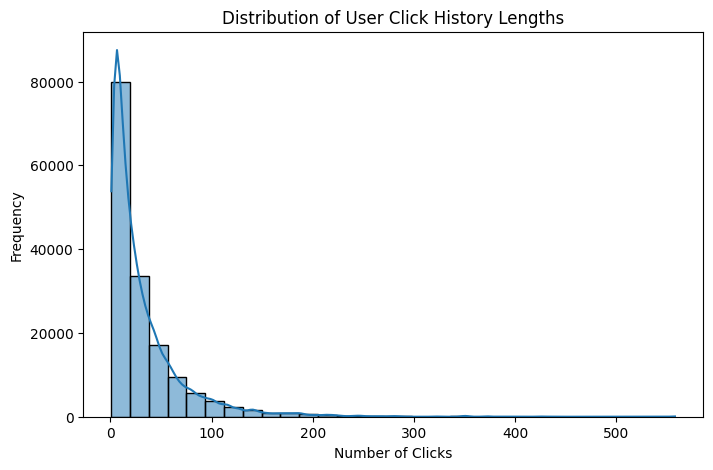

In [30]:
behaviors_df["history_length"] = behaviors_df["history"].apply(lambda x: len(eval(x)))

print("\nDistribution of User Click History Lengths:")
print(behaviors_df["history_length"].describe())

plt.figure(figsize=(8, 5))
sns.histplot(behaviors_df["history_length"], bins=30, kde=True)
plt.title("Distribution of User Click History Lengths")
plt.xlabel("Number of Clicks")
plt.ylabel("Frequency")
plt.show()


Most Popular News Categories:
category
news             15774
sports           14510
finance           3107
foodanddrink      2551
lifestyle         2479
                 ...  
movies             606
entertainment      587
kids                17
middleeast           2
northamerica         1
Name: count, Length: 17, dtype: int64

Most Popular News Subcategories:
subcategory
newsus                6564
football_nfl          5420
newspolitics          2826
newscrime             2254
weathertopstories     2047
                      ... 
northamerica-video       1
autosmidsize             1
entertainmenttv          1
autoslosangeles          1
celebhub                 1
Name: count, Length: 264, dtype: int64


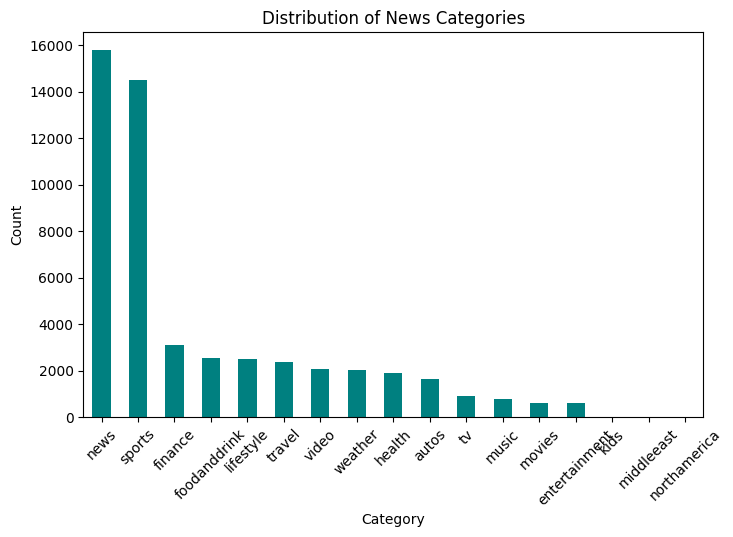

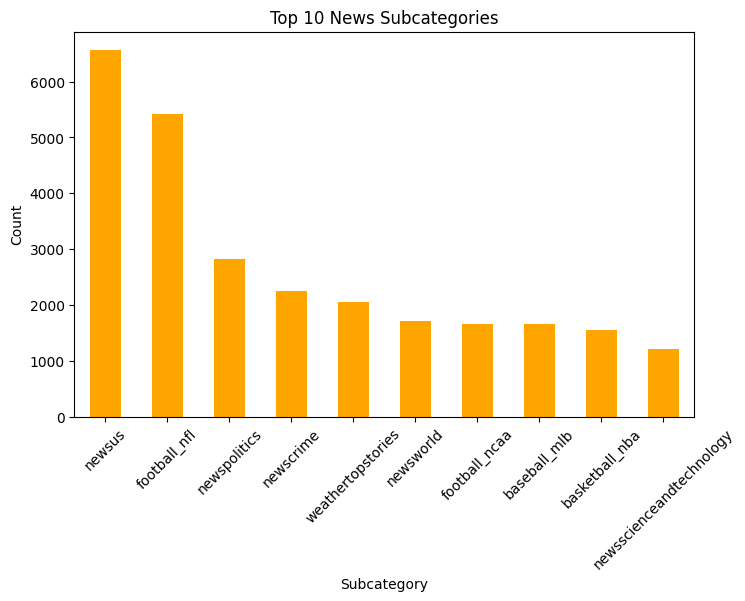

In [31]:
category_counts = news_df["category"].value_counts()
subcategory_counts = news_df["subcategory"].value_counts()

print("\nMost Popular News Categories:")
print(category_counts)

print("\nMost Popular News Subcategories:")
print(subcategory_counts)

plt.figure(figsize=(8, 5))
category_counts.plot(kind="bar", color="teal")
plt.title("Distribution of News Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 5))
subcategory_counts.head(10).plot(kind="bar", color="orange")
plt.title("Top 10 News Subcategories")
plt.xlabel("Subcategory")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


Time Range of Behaviors Data:
Start: 2019-11-09 00:00:19, End: 2019-11-14 23:59:13

Clicks by Hour of the Day:
hour
0     1017
1     1152
2     1816
3     3065
4     5320
      ... 
19    3634
20    3047
21    2600
22    1836
23    1320
Length: 24, dtype: int64


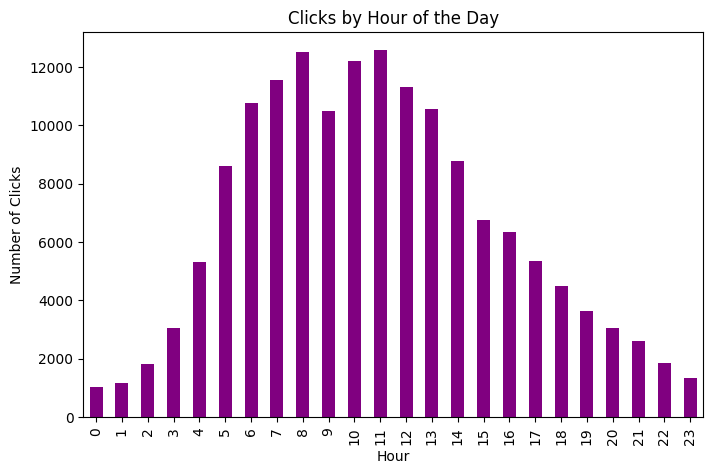

In [32]:
behaviors_df["time"] = pd.to_datetime(behaviors_df["time"])

print("\nTime Range of Behaviors Data:")
print(f"Start: {behaviors_df['time'].min()}, End: {behaviors_df['time'].max()}")

behaviors_df["hour"] = behaviors_df["time"].dt.hour
hourly_clicks = behaviors_df.groupby("hour").size()

print("\nClicks by Hour of the Day:")
print(hourly_clicks)

plt.figure(figsize=(8, 5))
hourly_clicks.plot(kind="bar", color="purple")
plt.title("Clicks by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Number of Clicks")
plt.show()



Entity Embeddings Shape: (26904, 101)

Relation Embeddings Shape: (1091, 101)


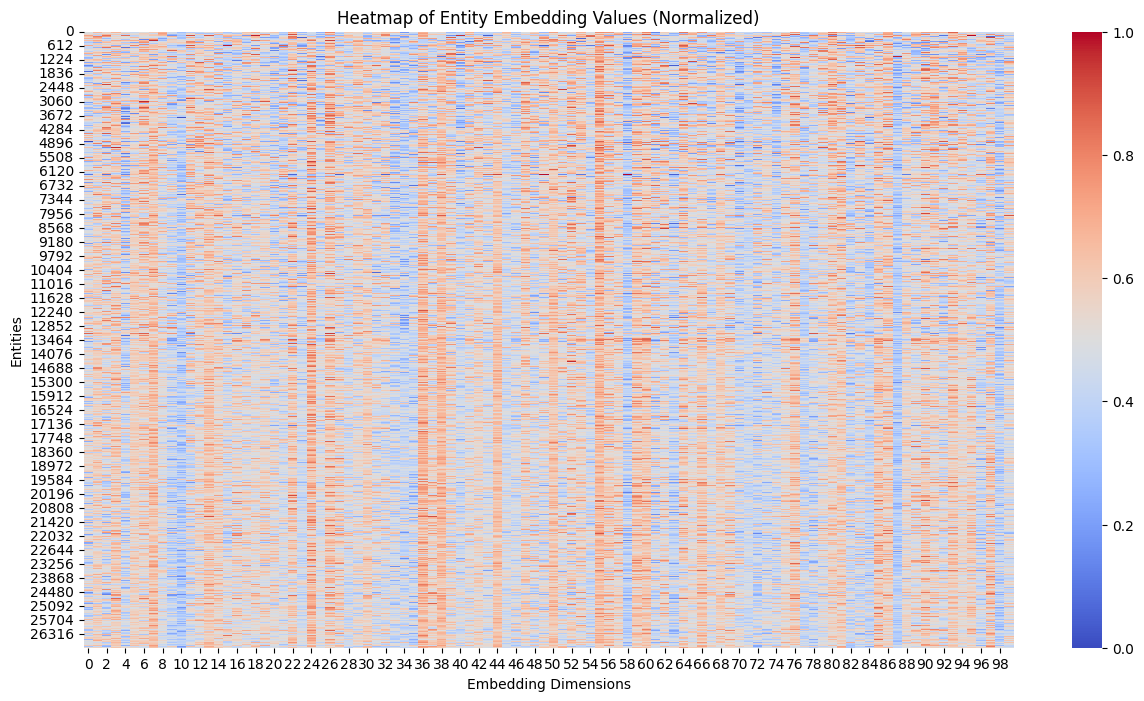

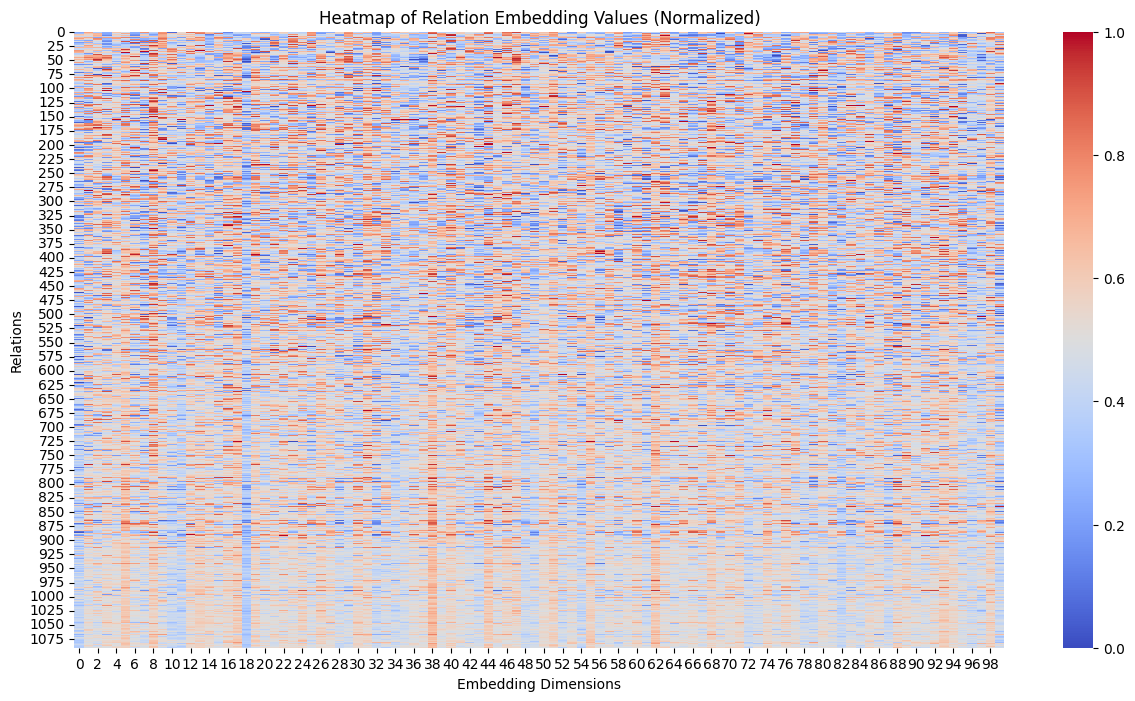

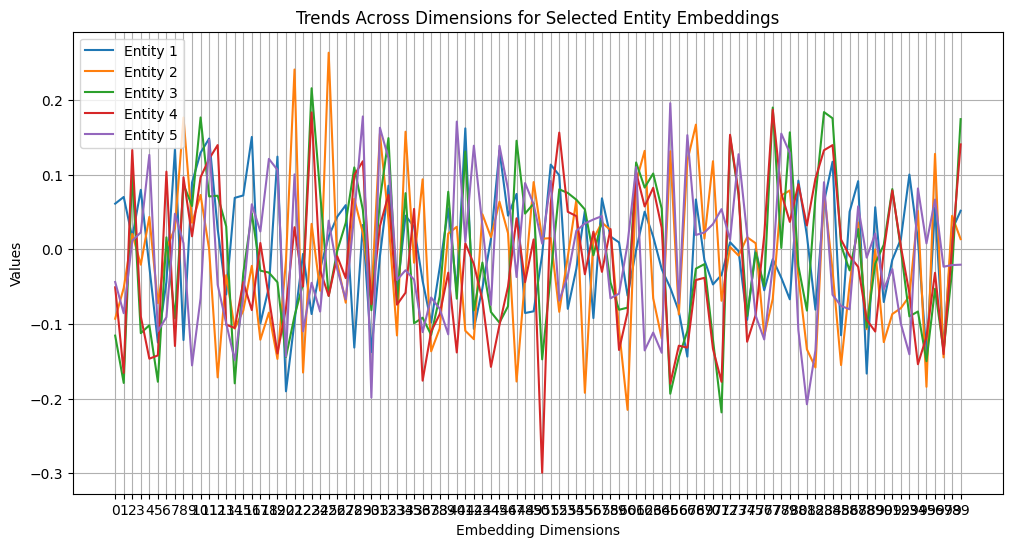

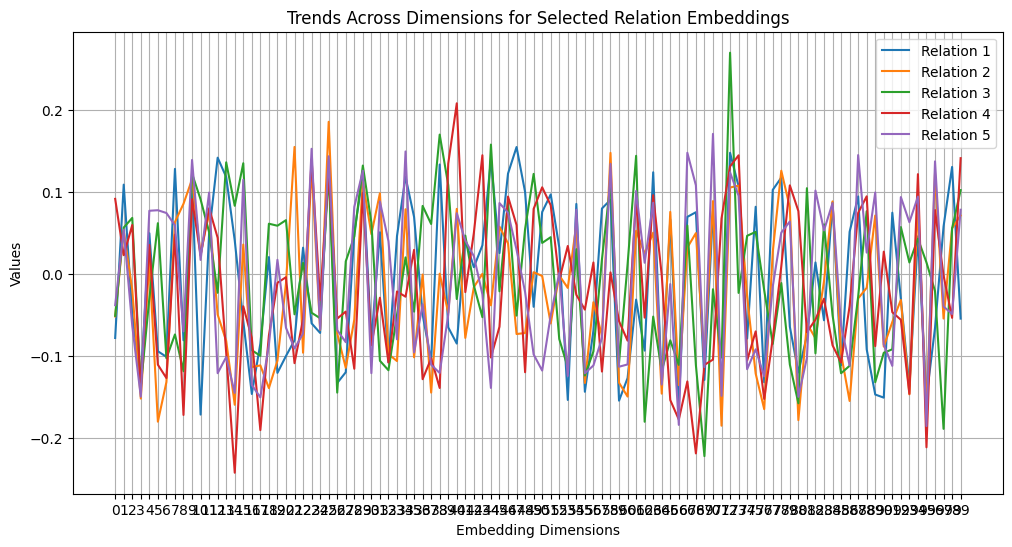

In [34]:

print("\nEntity Embeddings Shape:", entity_embeddings_df.shape)
print("\nRelation Embeddings Shape:", relation_embeddings_df.shape)

entity_embeddings_norm = entity_embeddings_df.iloc[:, 1:].apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0)

plt.figure(figsize=(15, 8))
sns.heatmap(entity_embeddings_norm, cmap="coolwarm", cbar=True)
plt.title("Heatmap of Entity Embedding Values (Normalized)")
plt.xlabel("Embedding Dimensions")
plt.ylabel("Entities")
plt.show()


relation_embeddings_norm = relation_embeddings_df.iloc[:, 1:].apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0)

plt.figure(figsize=(15, 8))
sns.heatmap(relation_embeddings_norm, cmap="coolwarm", cbar=True)
plt.title("Heatmap of Relation Embedding Values (Normalized)")
plt.xlabel("Embedding Dimensions")
plt.ylabel("Relations")
plt.show()

plt.figure(figsize=(12, 6))
for i in range(1, 6): 
    plt.plot(entity_embeddings_df.columns[1:], entity_embeddings_df.iloc[i, 1:], label=f"Entity {i}")

plt.title("Trends Across Dimensions for Selected Entity Embeddings")
plt.xlabel("Embedding Dimensions")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
for i in range(1, 6): 
    plt.plot(relation_embeddings_df.columns[1:], relation_embeddings_df.iloc[i, 1:], label=f"Relation {i}")

plt.title("Trends Across Dimensions for Selected Relation Embeddings")
plt.xlabel("Embedding Dimensions")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()
